In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df= pd.read_excel("/content/input_cpm.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


In [ ]:
df=df.loc[df['Obiettivo']=="REACH"]

In [ ]:
df['CPM']= (df['Importo speso (EUR)']/df['Impression'])*1000

In [ ]:
df.columns

Index(['anno', 'mese', 'anno mese', 'Nome del gruppo di inserzioni',
       'Nome dell'inserzione', 'Channel', 'Country', 'Contenuto',
       'post/stories', 'feed/dark', 'Audience', 'Tipologia', 'Obiettivo',
       'Nome della campagna', 'Stato di pubblicazione',
       'Livello di pubblicazione', 'Tipo di risultato', 'Risultati',
       'Copertura', 'Impression', 'Costo per risultato', 'Importo speso (EUR)',
       'Clic unici sul link', 'Visualizzazioni della pagina di destinazione',
       'Clic sul link',
       'Costo per visualizzazione della pagina di destinazione',
       'Interazioni con il post', 'Riproduzioni del video di 3 secondi',
       'Riproduzioni del video al 25%', 'Riproduzioni del video al 50%',
       'Riproduzioni del video al 75%', 'Riproduzioni del video al 95%',
       'Riproduzioni del video al 100%', 'Reazioni ai post',
       'Condivisioni dei post', 'Commenti ai post', '"Mi piace" sulla Pagina',
       'Clic (tutti)', 'Inizio dei report', 'Fine dei report

Text(0, 0.5, 'Frequency')

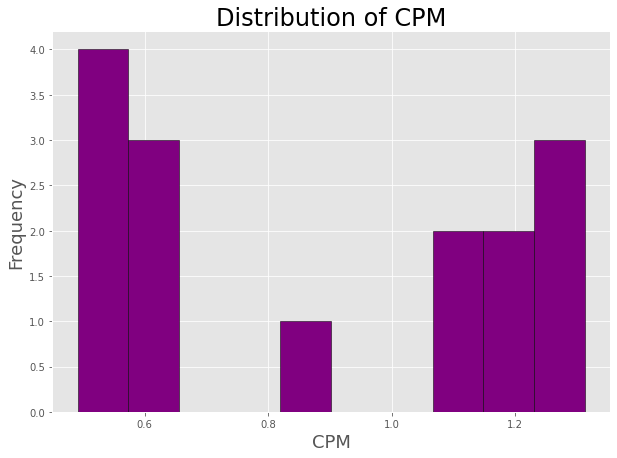

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the height
df.CPM.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of CPM', size=24)
plt.xlabel('CPM', size=18)
plt.ylabel('Frequency', size=18)



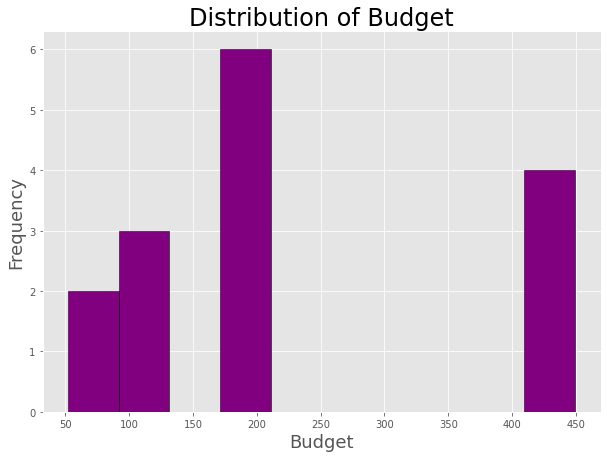

In [ ]:
# histogram of the weight
df['Importo speso (EUR)'].plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Budget', size=24)
plt.xlabel('Budget', size=18)
plt.ylabel('Frequency', size=18);

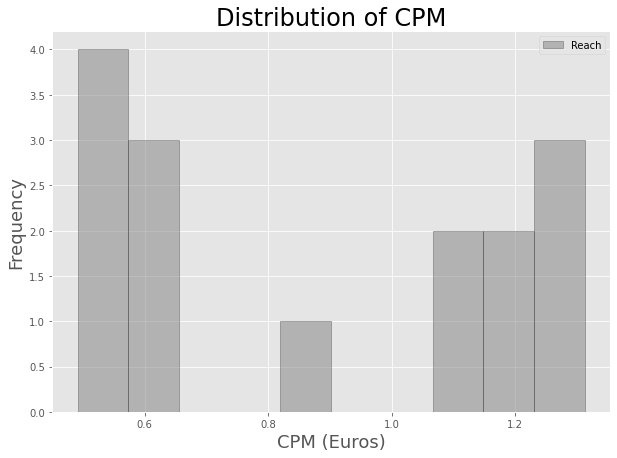

In [ ]:

# histogram 

#df[df['Obiettivo'] == 'POST_ENGAGEMENT'].CPM.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
#df[df['Obiettivo'] == 'VIDEO_VIEWS'].CPM.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Obiettivo'] == 'REACH'].CPM.plot(kind='hist', color='grey', edgecolor='black', alpha=0.5, figsize=(10, 7))

plt.legend(labels=['Reach'])
plt.title('Distribution of CPM', size=24)
plt.xlabel('CPM (Euros)', size=18)
plt.ylabel('Frequency', size=18);

In [ ]:

# Descriptive statistics reach
statistics_reach = df[df['Obiettivo'] == 'REACH'].describe()
statistics_reach.rename(columns=lambda x: x + '_Reach', inplace=True)
statistics_reach


,Audience_Reach,Risultati_Reach,Copertura_Reach,Impression_Reach,Costo per risultato_Reach,Importo speso (EUR)_Reach,Interazioni con il post_Reach,Reazioni ai post_Reach,Condivisioni dei post_Reach,Commenti ai post_Reach,Clic (tutti)_Reach,IR%_Reach,CPM_Reach
count,0.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,9.000000,11.000000,15.000000,15.000000,15.000000
mean,NaN,311579.933333,311579.933333,316447.466667,0.906109,226.533333,22542.533333,36.733333,3.888889,3.454545,768.000000,0.070244,0.885226
std,NaN,268757.101485,268757.101485,269727.595866,0.347602,144.578197,22062.015223,45.639060,4.859127,2.841255,657.196318,0.039204,0.335847
min,NaN,39615.000000,39615.000000,39643.000000,0.491064,52.060000,115.000000,2.000000,1.000000,1.000000,137.000000,0.000576,0.491064
25%,NaN,139888.000000,139888.000000,144653.000000,0.599230,113.940000,4604.000000,10.500000,1.000000,1.000000,265.000000,0.062218,0.581456
50%,NaN,200352.000000,200352.000000,202830.000000,0.879555,196.510000,14017.000000,18.000000,2.000000,2.000000,565.000000,0.081931,0.862620
75%,NaN,366336.500000,366336.500000,372369.000000,1.244646,319.280000,41487.000000,47.500000,2.000000,5.000000,1139.500000,0.092284,1.191188
max,NaN,915318.000000,915318.000000,915318.000000,1.369084,449.480000,63218.000000,178.000000,15.000000,8.000000,2414.000000,0.117311,1.313220


**Test Shapiro-Wilk**

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(statistics_reach['CPM_Reach'])
print(shapiro_test)


(0.48242783546447754, 6.340094387269346e-06)



**Scatter plots with Matplotlib and linear regression with Numpy**

In [ ]:
df['CPM_LOG']= np.log(df['CPM'])
df['BUDGET_LOG']= np.log(df['Importo speso (EUR)'])


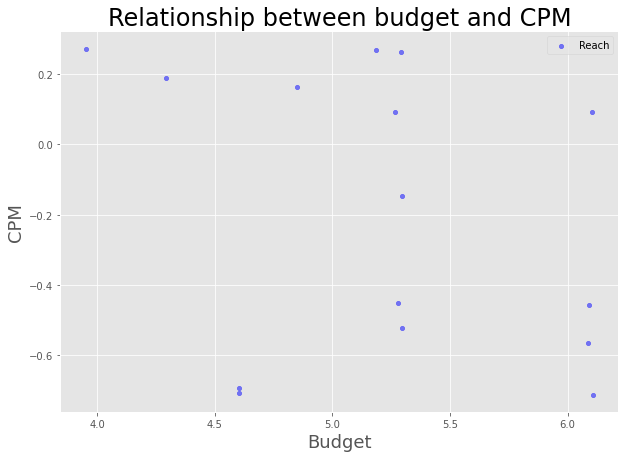

In [ ]:
# Scatter plot of Height and Weight

ax1 = df[df['Obiettivo'] == 'REACH'].plot(kind='scatter', x='BUDGET_LOG', y='CPM_LOG', color='blue', alpha=0.5, figsize=(10, 7))
#df[df['Obiettivo'] == 'VIDEO_VIEWS'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM_LOG', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
#df[df['Obiettivo'] == 'REACH'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM_LOG', color='orange', alpha=0.5, figsize=(10 ,7), ax=ax1)



plt.legend(labels=['Reach'])
plt.title('Relationship between budget and CPM', size=24)
plt.xlabel('Budget', size=18)
plt.ylabel('CPM', size=18);

**best fit polynomials**

In [ ]:
import numpy as np

# best fit polynomials

df_reach = df[df['Obiettivo'] == 'REACH']






In [ ]:

# polynomial - REACH
reach_fit = np.polyfit( df_reach['Importo speso (EUR)'], df_reach.CPM, 1)
reach_fit


array([-8.20700680e-04,  1.07114223e+00])

The following plot depicts the scatter plots as well as the previous regression lines

Text(6, 20, 'y=1.07+-0.00*x')

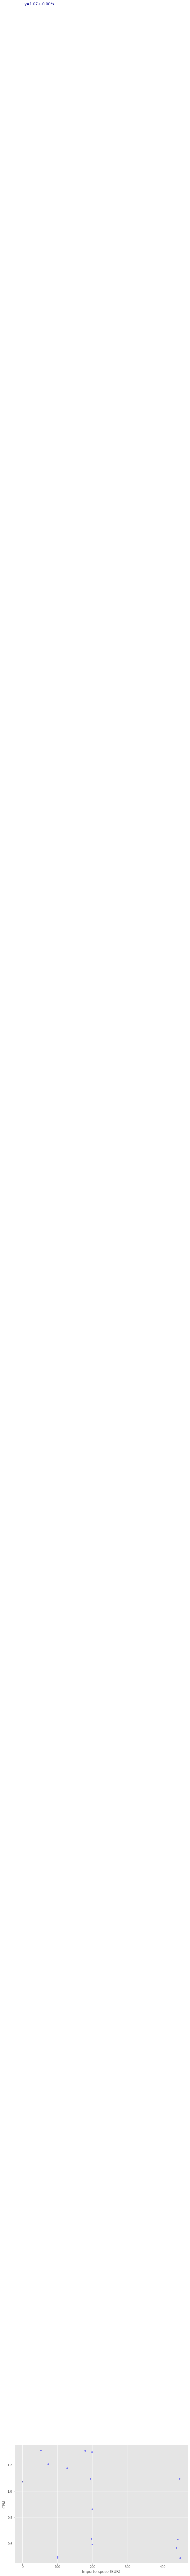

In [ ]:
# scatter plots and regression lines
ax1 = df[df['Obiettivo'] == 'REACH'].plot(kind='scatter', x='Importo speso (EUR)', y='CPM', color='blue', alpha=0.5, figsize=(10, 7))

# regression lines
plt.plot(df_reach.CPM, reach_fit[0] * df_reach.CPM + reach_fit[1], color='darkblue', linewidth=2)

# regression equations
plt.text(6, 20, 'y={:.2f}+{:.2f}*x'.format(reach_fit[1], reach_fit[0]), color='darkblue', size=12)
#plt.text(0.5, 0.5, 'Some text', transform=ax.transAxes)

# legend, title and labels.
#plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
#plt.title('Relationship between Height and Weight', size=24)
#plt.xlabel('Height (inches)', size=18)
#plt.ylabel('Weight (pounds)', size=18);

**Multiple linear regression**


encoding categorical variable

In [ ]:
df.columns
#mese, channel, post/stories, Tipologia, Tipologia

Index(['anno', 'mese', 'anno mese', 'Nome del gruppo di inserzioni',
       'Nome dell'inserzione', 'Channel', 'Country', 'Contenuto',
       'post/stories', 'feed/dark', 'Audience', 'Tipologia', 'Obiettivo',
       'Nome della campagna', 'Stato di pubblicazione',
       'Livello di pubblicazione', 'Tipo di risultato', 'Risultati',
       'Copertura', 'Impression', 'Costo per risultato', 'Importo speso (EUR)',
       'Clic unici sul link', 'Visualizzazioni della pagina di destinazione',
       'Clic sul link',
       'Costo per visualizzazione della pagina di destinazione',
       'Interazioni con il post', 'Riproduzioni del video di 3 secondi',
       'Riproduzioni del video al 25%', 'Riproduzioni del video al 50%',
       'Riproduzioni del video al 75%', 'Riproduzioni del video al 95%',
       'Riproduzioni del video al 100%', 'Reazioni ai post',
       'Condivisioni dei post', 'Commenti ai post', '"Mi piace" sulla Pagina',
       'Clic (tutti)', 'Inizio dei report', 'Fine dei report

In [ ]:
df=pd.get_dummies(df, columns= {"mese", "Channel", "post/stories", "Tipologia", "Obiettivo"})

In [ ]:
for i in list(set(df.columns)):
  if "Channel" in i:
    print(i)


Channel_FBIG


Calculate number of posts that month and use it as a variable

In [ ]:
df['numero post'] = df.groupby('anno mese')['anno mese'].transform('count')

**We can use this dataframe to obtain a multiple linear regression model using Scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df[[#"Channel_IG",
            #"post/stories_Story",
            #"Tipologia_Video",
            #"post/stories_post",
            "Tipologia_Static", 
            'numero post',
            #'Obiettivo_VIDEO_VIEWS',
            #'Obiettivo_REACH',
            #'Obiettivo_POST_ENGAGEMENT'



            #"Channel_FBIG",
            #"Channel_FB"
            ]], df['CPM'])


LinearRegression()

In [ ]:

# get the slope and intercept of the line best fit.
print(mlr.intercept_)

3.144682103498879


In [ ]:

print(mlr.coef_)


[-0.08215022 -0.29847379]


In [ ]:
# fit linear regression
m1=mlr.fit(df[["Channel_IG",
            #"post/stories_Story",
            #"Tipologia_Video",
            #"post/stories_post",
            "Tipologia_Static", 
            'numero post',
            #'Obiettivo_VIDEO_VIEWS',
            #'Obiettivo_REACH',
            #'Obiettivo_POST_ENGAGEMENT'
                        ]], df['CPM'])


KeyError: ignored

In [ ]:
import statsmodels.api as sm
from scipy import stats

df 

X = df[[#"Channel_IG",
            #"post/stories_Story",
            #"Tipologia_Video",
            #"post/stories_post",
            "Tipologia_Static", 
            'numero post',
            #'Obiettivo_VIDEO_VIEWS',
            #'Obiettivo_REACH',
            #'Obiettivo_POST_ENGAGEMENT'
                        ]]
y = df.CPM


In [ ]:

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
print(est.fit().f_pvalue)

0.293264597715017


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
n=len(df)

# use scikit-learn's linear regression model to obtain the coefficient estimates
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)




beta_hat = [reg.intercept_] + reg.coef_.tolist()
beta_hat

# compute the p-values
from scipy.stats import t
# add ones column
X1 = np.column_stack((np.ones(n), X))
# standard deviation of the noise.
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))
# estimate the covariance matrix for beta 
beta_cov = np.linalg.inv(X1.T@X1)
# the t-test statistic for each variable from the formula from above figure
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
# compute 2-sided p-values.
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2 
#t_vals


reg.coef_

array([-0.08215022, -0.29847379])

Intercetta, "Tipologia_Static", 'numero post' 'Obiettivo_VIDEO_VIEWS', 'Obiettivo_REACH'


In [ ]:
p_vals


array([0.04751982, 0.76945501, 0.13588791])